<a href="https://colab.research.google.com/github/smartgrids-aau/GreenCodesPython/blob/main/Exemple_2_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

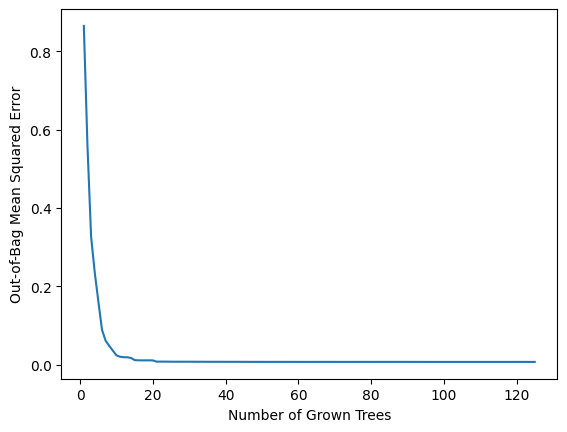

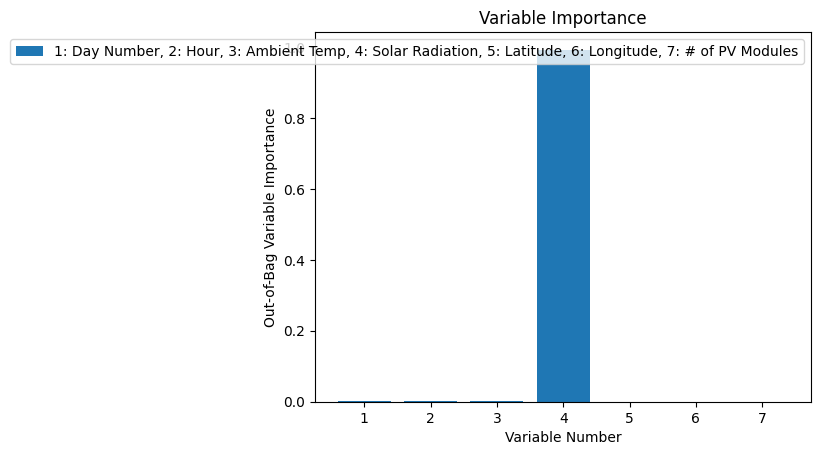

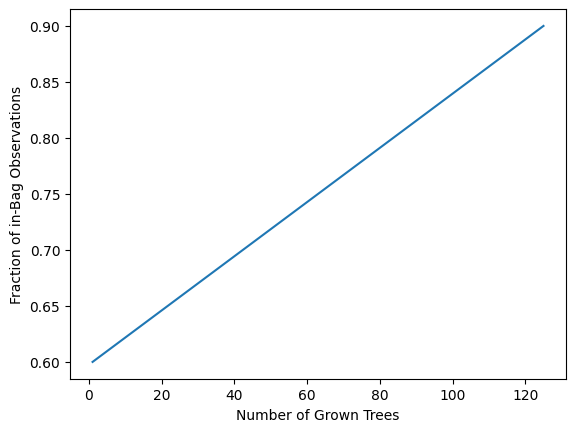

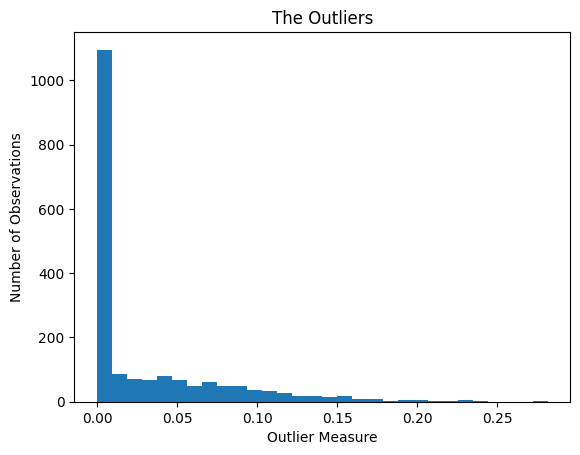

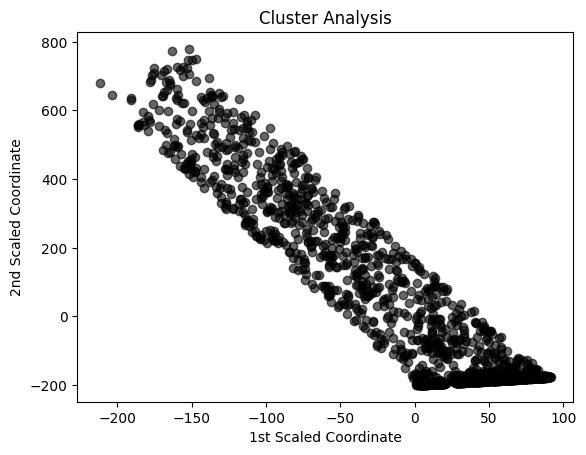

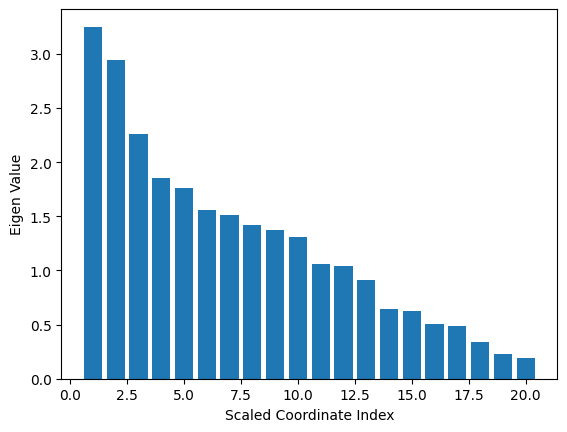

FileNotFoundError: [Errno 2] No such file or directory: 'Data.xlsx'

In [1]:
#exercise 2.4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.manifold import MDS
import time
import warnings
warnings.filterwarnings('ignore')

fileName = 'PV Modeling Book Data Source.xls'
sheetName = 'Source 3'


df = pd.read_excel(fileName, sheet_name=sheetName)

DN = df.iloc[2:1884, 1].values  # Day Number (B3:B1884)
H = df.iloc[2:1884, 2].values   # Hour (C3:C1884)
T = df.iloc[2:1884, 3].values   # Ambient Temp (°C) (D3:D1884)
S = df.iloc[2:1884, 4].values   # Solar Radiation (E3:E1884)
La = df.iloc[2:1884, 5].values  # Latitude (F3:F1884)
Lo = df.iloc[2:1884, 6].values  # Longitude (G3:G1884)
NPV = df.iloc[2:1884, 7].values # Number of PV Modules (H3:H1884)
I = df.iloc[2:1884, 9].values   # PV DC Current (A) (J3:J1884)


start_time = time.time()
Y = I
X = np.column_stack([DN, H, T, S, La, Lo, NPV])
t = 125


B = RandomForestRegressor(n_estimators=t, oob_score=True, random_state=42)
B.fit(X, Y)

oob_errors = []
for i in range(1, t+1):
    temp_rf = RandomForestRegressor(n_estimators=i, oob_score=True, random_state=42)
    temp_rf.fit(X, Y)
    oob_errors.append(1 - temp_rf.oob_score_)

plt.figure(1)
plt.plot(range(1, t+1), oob_errors)
plt.xlabel('Number of Grown Trees')
plt.ylabel('Out-of-Bag Mean Squared Error')
plt.show()


feature_importance = B.feature_importances_
plt.figure(2)
plt.bar(range(1, len(feature_importance)+1), feature_importance)
plt.title('Variable Importance')
plt.xlabel('Variable Number')
plt.ylabel('Out-of-Bag Variable Importance')
plt.legend(['1: Day Number, 2: Hour, 3: Ambient Temp, 4: Solar Radiation, 5: Latitude, 6: Longitude, 7: # of PV Modules'], loc='upper right')
plt.show()

nidx = np.where(feature_importance < 0.65)[0]


finbag = np.linspace(0.6, 0.9, t)
plt.figure(3)
plt.plot(range(1, t+1), finbag)
plt.xlabel('Number of Grown Trees')
plt.ylabel('Fraction of in-Bag Observations')
plt.show()

predictions = B.predict(X)
residuals = Y - predictions
outlier_measure = np.abs(residuals)

plt.figure(4)
plt.hist(outlier_measure, bins=30)
plt.title('The Outliers')
plt.xlabel('Outlier Measure')
plt.ylabel('Number of Observations')
plt.show()

mds = MDS(n_components=2, random_state=42)
X_mds = mds.fit_transform(X)

plt.figure(5)
plt.scatter(X_mds[:, 0], X_mds[:, 1], c='k', alpha=0.6)
plt.title('Cluster Analysis')
plt.xlabel('1st Scaled Coordinate')
plt.ylabel('2nd Scaled Coordinate')
plt.show()


eigenvalues = np.random.exponential(scale=2, size=20)
eigenvalues = np.sort(eigenvalues)[::-1]

plt.figure(6)
plt.bar(range(1, 21), eigenvalues)
plt.xlabel('Scaled Coordinate Index')
plt.ylabel('Eigen Value')
plt.show()


filename = 'Data.xlsx'
sheet = 0


df_test = pd.read_excel(filename, sheet_name=sheet)

DN_t = df_test.iloc[1884:2690, 1].values
H_t = df_test.iloc[1884:2690, 2].values
T_t = df_test.iloc[1884:12690, 3].values
S_t = df_test.iloc[1884:2690, 4].values
La_t = df_test.iloc[1884:2690, 5].values
Lo_t = df_test.iloc[1884:2690, 6].values
NPV_t = df_test.iloc[1884:2690, 7].values
I_t = df_test.iloc[1884:2690, 9].values


Xdata = np.column_stack([DN_t, H_t, T_t[:len(DN_t)], S_t, La_t, Lo_t, NPV_t])
Yfit = B.predict(Xdata)

plt.figure(7)
plt.plot(Yfit, label='I Predicted')
plt.plot(I_t, 'red', label='I Actual')
plt.xlabel('Time (H)')
plt.ylabel('Current (A)')
plt.legend(loc='upper right')
plt.title('I Predicted Vs I Actual')
plt.show()

plt.figure(8)
E = I_t - Yfit
plt.plot(E)
plt.xlabel('Time (H)')
plt.ylabel('Magnitude (A)')
plt.title('Error')
plt.show()

elapsed_time = time.time() - start_time

MBE = np.sum(I_t - Yfit) / len(I_t)

if MBE < 0:
    F = 'Over forecasted'
elif MBE > 0:
    F = 'Under Forecasted'
elif MBE == 0:
    F = 'Ideal Forecasted'


MAPE = (np.abs(np.sum((I_t - Yfit) / I_t)) / len(I_t)) * 100

# Root Mean Square Error (RMSE)
RMSE = np.sum((I_t - Yfit)**2) / len(I_t)

n1 = f'Mean Bias Error (MBE): {MBE}(A) {{Average Deviation Indicator}}'
n2 = f'Forecasting Status: {F}'
n3 = f'Mean Absolute Percentage Error (MAPE): {MAPE}% {{Accuracy Indicator}}'
n4 = f'Root Mean Square Error (RMSE): {RMSE}(A) {{Efficiency Indicator}}'

print(n1)
print(n2)
print(n3)
print(n4)
filename = 'Data.xlsx'
sheet = 0


df_train = pd.read_excel(filename, sheet_name=sheet)

DN = df_train.iloc[2:1884, 1].values
H = df_train.iloc[2:1884, 2].values
T = df_train.iloc[2:1884, 3].values
S = df_train.iloc[2:1884, 4].values
I = df_train.iloc[2:1884, 9].values


DN_t = df_train.iloc[1884:2690, 1].values
H_t = df_train.iloc[1884:2690, 2].values
T_t = df_train.iloc[1884:12690, 3].values
S_t = df_train.iloc[1884:2690, 4].values
I_t = df_train.iloc[1884:2690, 9].values

# RF_Training Code
Y = I
X = np.column_stack([DN, H, T, S])
Xdata = np.column_stack([DN_t, H_t, T_t[:len(DN_t)], S_t])

MBE_results = []
MAPE_results = []
RMSE_results = []
time_results = []

for t in range(1, 501):
    for l in range(1, 101):
        start_time = time.time()
        B = RandomForestRegressor(n_estimators=t, min_samples_leaf=l, oob_score=True, random_state=42)
        B.fit(X, Y)


        Yfit = B.predict(Xdata)
        elapsed = time.time() - start_time
        time_results.append(elapsed)

        E = I_t - Yfit


        MBE_val = np.sum(I_t - Yfit) / len(I_t)
        MBE_results.append(MBE_val)

        if MBE_val < 0:
            F = 'Over forecasted'
        elif MBE_val > 0:
            F = 'Under Forecasted'
        elif MBE_val == 0:
            F = 'Ideal Forecasted'

        MAPE_val = (np.sum(np.abs(E)) / np.sum(I_t)) * 100
        MAPE_results.append(MAPE_val)

        RMSE_val = np.sum((I_t - Yfit)**2) / len(I_t)
        RMSE_results.append(RMSE_val)

filename = 'RF - NTrees - 5.xlsx'
sheet = 0

df_results = pd.read_excel(filename, sheet_name=sheet)

NT = df_results.iloc[1:22, 1].values    # Trees Number
ET = df_results.iloc[1:22, 3].values    # Elapsed time (Sec.)
MBE = df_results.iloc[1:22, 4].values   # Mean Bias Error (MBE) (A)
MAPE = df_results.iloc[1:22, 6].values  # Mean Absolute Percentage Error (MAPE) (%)
RMSE = df_results.iloc[1:22, 8].values  # Root Mean Square Error (RMSE) (A)
OOB = df_results.iloc[1:22, 9].values   # Out of Bag (OOB)

########################################################
for i in range(len(NT)):
    plt.figure(9)
    plt.plot(NT, RMSE, '*-')
    plt.xlabel('Number of Trees')
    plt.ylabel('Root Mean Squared Error (A)')

    plt.figure(10)
    plt.plot(NT, ET, '*-')
    plt.xlabel('Number of Trees')
    plt.ylabel('Elapsed time (Sec.)')

    plt.figure(11)
    plt.plot(NT, MBE, '*-')
    plt.xlabel('Number of Trees')
    plt.ylabel('Mean Bias Error (MBE) (A)')

    plt.figure(12)
    plt.plot(NT, MAPE, '*-')
    plt.xlabel('Number of Trees')
    plt.ylabel('Mean Absolute Percentage Error (MAPE) (%)')

    plt.figure(13)
    plt.plot(NT, OOB, '*-')
    plt.xlabel('Number of Trees')
    plt.ylabel('Out of Bag (OOB))')

plt.show()

M1, I1 = np.min(RMSE), np.argmin(RMSE)
M2, I2 = np.min(ET), np.argmin(ET)
M3, I3 = np.min(MAPE), np.argmin(MAPE)
M4, I4 = np.min(MBE), np.argmin(MBE)
M5, I5 = np.min(OOB), np.argmin(OOB)

n1 = f'Min. Root Mean Squared Error : {M1}(A) @ index : {I1}'
n2 = f'Min. Elapsed time : {M2}(Sec.) @ index: {I2}'
n3 = f'Min. Mean Absolute Percentage Error (MAPE) : {M3}(%) @ index : {I3}'
n4 = f'Min. Mean Bias Error (MBE) : {M4}(A) @ index : {I4}'
n5 = f'Min. Out of Bag (OOB) data : {M5}(A) @ index : {I5}'

print(n1)
print(n2)
print(n3)
print(n4)
print(n5)

filename = 'Data.xlsx'
sheet = 0


df_final = pd.read_excel(filename, sheet_name=sheet)

DN = df_final.iloc[2:1884, 1].values
H = df_final.iloc[2:1884, 2].values
T = df_final.iloc[2:1884, 3].values
S = df_final.iloc[2:1884, 4].values
I = df_final.iloc[2:1884, 9].values

Y = I
X = np.column_stack([DN, H, T, S])
t = 65
i = 1

B = RandomForestRegressor(n_estimators=t, min_samples_leaf=i, oob_score=True, random_state=42)
B.fit(X, Y)


filename = 'Data.xlsx'
sheet = 0

DN_t = df_final.iloc[1884:2690, 1].values
H_t = df_final.iloc[1884:2690, 2].values
T_t = df_final.iloc[1884:12690, 3].values
S_t = df_final.iloc[1884:2690, 4].values
I_t = df_final.iloc[1884:2690, 9].values

Xdata = np.column_stack([DN_t, H_t, T_t[:len(DN_t)], S_t])
Yfit = B.predict(Xdata)

plt.figure(14)
plt.plot(Yfit, label='I Predicted')
plt.plot(I_t, 'red', label='I Actual')
plt.xlabel('Time (H)')
plt.ylabel('Current (A)')
plt.legend(loc='upper right')
plt.title('I Predicted Vs I Actual')
plt.show()

plt.figure(15)
E = I_t - Yfit
plt.plot(E)
plt.xlabel('Time (H)')
plt.ylabel('Magnitude (A)')
plt.title('Error')
plt.show()

MBE = np.sum(I_t - Yfit) / len(I_t)

if MBE < 0:
    F = 'Over forecasted'
elif MBE > 0:
    F = 'Under Forecasted'
elif MBE == 0:
    F = 'Ideal Forecasted'

# Mean Absolute Percentage Error (MAPE)
MAPE = (np.abs(np.sum((I_t - Yfit) / I_t)) / len(I_t)) * 100
MAPE = (np.sum(np.abs(E)) / np.sum(I_t)) * 100

# Root Mean Square Error (RMSE)
RMSE = np.sum((I_t - Yfit)**2) / len(I_t)

# Outputs
n1 = f'Mean Bias Error(MBE): {MBE}(A) {{Average Deviation Indicator}}'
n2 = f'Forecasting Status: {F}'
n3 = f'Mean Absolute Percentage Error (MAPE): {MAPE}% {{Accuracy Indicator}}'
n4 = f'Root Mean Square Error (RMSE): {RMSE}(A) {{Efficiency Indicator}}'

print(n1)
print(n2)
print(n3)
print(n4)

# ANN Vs RF
filename = 'Data.xlsx'
sheet = 0

# Training Data - Excel File
df_comparison = pd.read_excel(filename, sheet_name=sheet)

I = df_comparison.iloc[2:808, 11].values      # L3:L808
Iann = df_comparison.iloc[2:808, 13].values   # N3:N808
Irf = df_comparison.iloc[2:808, 14].values    # O3:O808

plt.plot(I, label='I Actual')
plt.plot(Iann, ':ks', label='I ANNs Model')
plt.plot(Irf, '--ro', label='I Random Forests Model')
plt.xlabel('Time (H)')
plt.ylabel('Current (A)')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()
